In [0]:
# HAcer EEGLEarn con el dataset raw

In [0]:
import scipy
import pandas as pd
from scipy import io
import os

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!git clone https://github.com/pbashivan/EEGLearn.git 

Cloning into 'EEGLearn'...
remote: Enumerating objects: 137, done.
remote: Total 137 (delta 0), reused 0 (delta 0), pack-reused 137
Receiving objects: 100% (137/137), 26.40 MiB | 20.15 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [0]:
cd /content/drive/My\ Drive/EEGLearn_theano

/content/drive/My Drive/EEGLearn_theano


In [0]:
pip install -r requirements.txt

     |████████████████████████████████| 133kB 9.2MB/s 
  Created wheel for Lasagne: filename=Lasagne-0.1-cp36-none-any.whl size=79275 sha256=1e27a06017cd5654830f325cb9bc3d28aa7f7629397121d6e5be1b4c1c0c6362
  Stored in directory: /root/.cache/pip/wheels/a5/8e/31/b4cae7e5507f8582e77d7f5cf2815be8820ccacfa0519ca60c
Successfully built Lasagne


In [0]:
pip install theano==0.8

     |████████████████████████████████| 2.9MB 9.6MB/s 
  Created wheel for theano: filename=Theano-0.8.0-cp36-none-any.whl size=2722121 sha256=d9e60bb11af76b1d7db5fda48f6b1785738086e939150286e7fe17241578a76c
  Stored in directory: /root/.cache/pip/wheels/7c/6b/28/f118060de7c9a51edc6bad39fc09cf06e2c0ff662184ff2fa9
Successfully built theano
ERROR: pymc3 3.7 has requirement theano>=1.0.4, but you'll have theano 0.8.0 which is incompatible.
  Found existing installation: Theano 1.0.4
    Uninstalling Theano-1.0.4:
      Successfully uninstalled Theano-1.0.4


In [0]:
import eeglearn
import eeglearn.utils
import eeglearn.eeg_cnn_lib as eeglib

In [0]:
images = eeglib.gen_images(locs, features, nGridPoints)

In [0]:
from eeglearn.utils import load_data

In [0]:
features, labels = load_data('./SampleData/FeatureMat_timeWin.mat')

Loading data from ./SampleData/FeatureMat_timeWin.mat
Data loading complete. Shape is (2670, 1345)


In [0]:
import scipy
dataMat = scipy.io.loadmat('./SampleData/FeatureMat_timeWin.mat', mat_dtype=True)

In [0]:
dataMat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Oct 23 14:27:52 2015',
 '__version__': '1.0',
 'features': array([[-0.16897227, -0.17832198, -0.09515447, ...,  0.43806902,
         -0.02864976,  1.        ],
        [ 1.15085451,  1.02301335,  0.48282339, ...,  0.59169703,
         -0.01846558,  1.        ],
        [-0.23989182, -0.28638305, -0.11766036, ...,  1.27540665,
         -0.0195743 ,  1.        ],
        ...,
        [-0.11986004, -0.04774415, -0.051923  , ...,  0.17035878,
         -0.02089067,  4.        ],
        [-0.28938899, -0.23457971, -0.12562679, ..., -0.29564054,
         -0.03130672,  4.        ],
        [-0.36368214, -0.30952592, -0.18273422, ...,  1.54422899,
          0.02607688,  4.        ]])}

In [0]:
dataMat.get('features').shape

(2670, 1345)

In [0]:
values_ft = dataMat.get('features')[:,0:-1]
values_ft.shape

(2670, 1344)

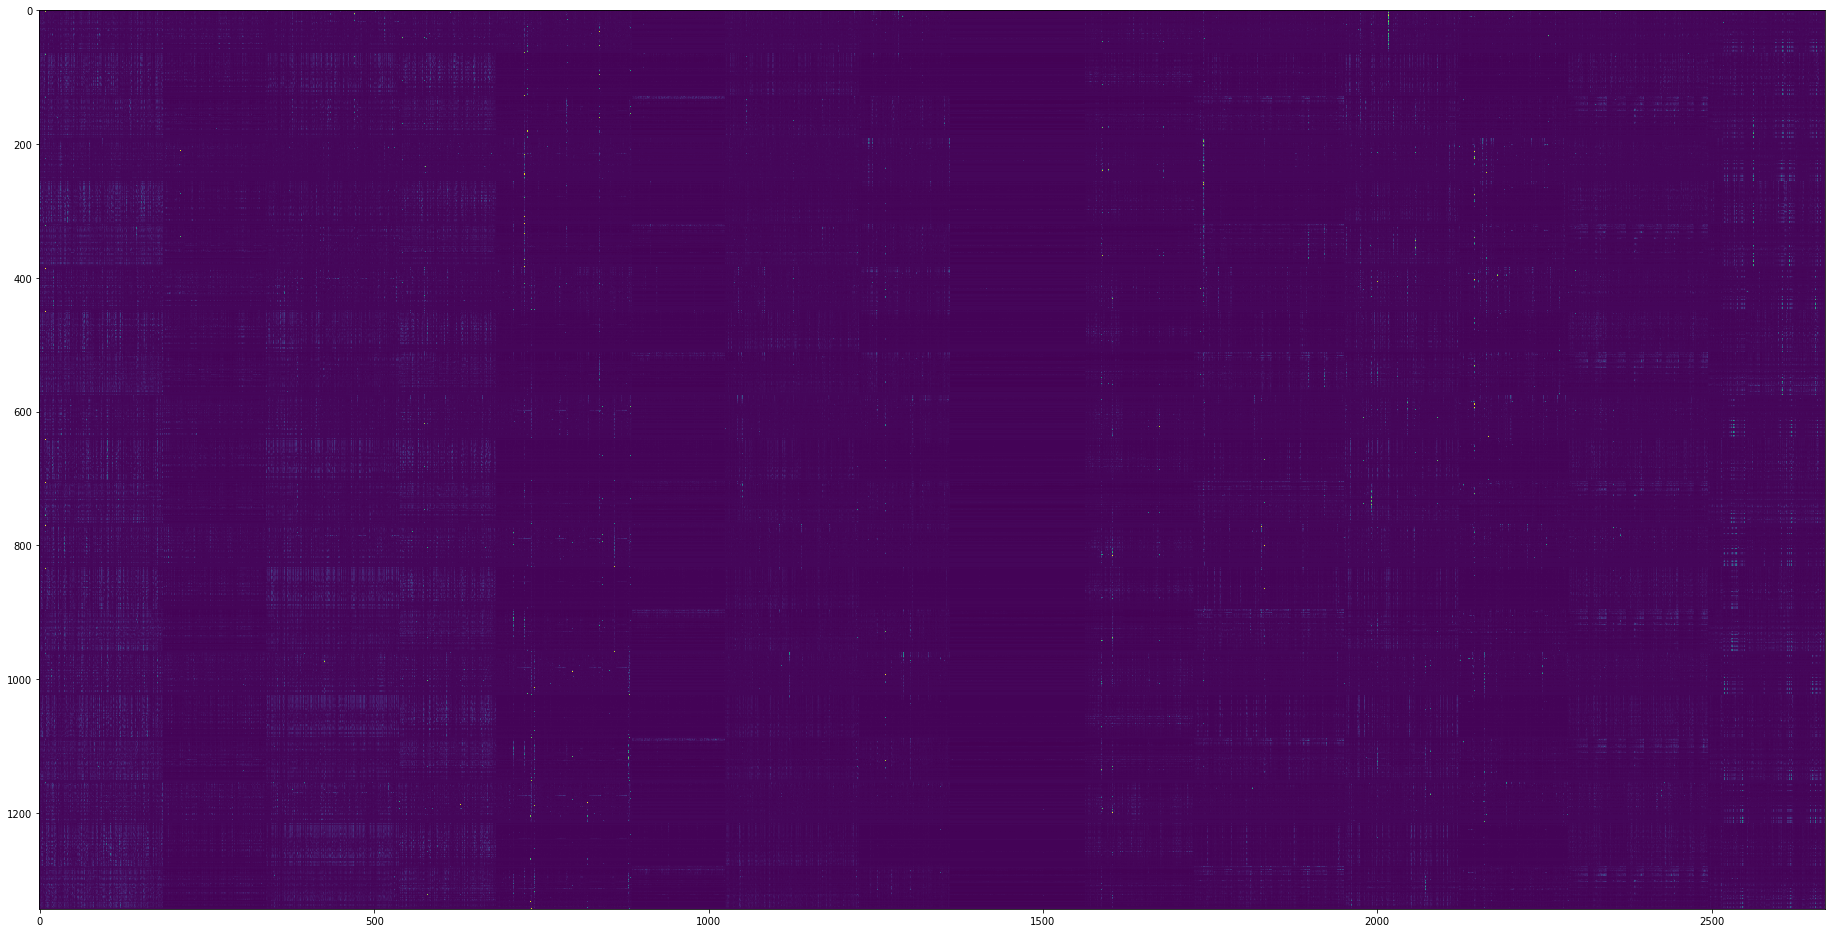

In [0]:
plt.figure(figsize=(32, 64))
plt.imshow(values_ft.T)



In [0]:
dataMat.get('labels').shape

AttributeError: ignored

In [0]:
trials = scipy.io.loadmat('./SampleData/trials_subNums.mat', mat_dtype=True)
trials = trials.get('subjectNum')
trials.shape

(1, 2670)

In [0]:
def load_data(data_file):
    """
    Loads the data from MAT file. MAT file should contain two
    variables. 'featMat' which contains the feature matrix in the
    shape of [samples, features] and 'labels' which contains the output
    labels as a vector. Label numbers are assumed to start from 1.
    Parameters
    ----------
    data_file: str
    Returns
    -------
    data: array_like
    """
    print("Loading data from %s" % (data_file))

    dataMat = scipy.io.loadmat(data_file, mat_dtype=True)

    print("Data loading complete. Shape is %r" % (dataMat['features'].shape,))
    return dataMat['features'][:, :-1], dataMat['features'][:, -1] - 1   # Sequential indices

features, labels = load_data('./SampleData_original/FeatureMat_timeWin.mat')

Loading data from ./SampleData_original/FeatureMat_timeWin.mat
Data loading complete. Shape is (2670, 1345)


In [0]:
from collections import Counter
print(Counter(labels))
print(len(labels))

Counter({0.0: 757, 1.0: 715, 2.0: 640, 3.0: 558})
2670


**En Tensorflow**    
https://github.com/YangWangsky/tf_EEGLearn/tree/master/EEGLearn

In [0]:
!git clone https://github.com/YangWangsky/tf_EEGLearn.git


Cloning into 'tf_EEGLearn'...
remote: Enumerating objects: 41, done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41
Unpacking objects: 100% (41/41), done.


In [0]:
cd /content/drive/My\ Drive/tf_EEGLearn/

/content/drive/My Drive/tf_EEGLearn


In [0]:
#utils.py

import numpy as np
import math as m
import os
import scipy.io
from scipy.interpolate import griddata
from sklearn.preprocessing import scale
from functools import reduce


def cart2sph(x, y, z):
    """
    Transform Cartesian coordinates to spherical
    :param x: X coordinate
    :param y: Y coordinate
    :param z: Z coordinate
    :return: radius, elevation, azimuth
    """
    x2_y2 = x**2 + y**2
    r = m.sqrt(x2_y2 + z**2)                    # r     tant^(-1)(y/x)
    elev = m.atan2(z, m.sqrt(x2_y2))            # Elevation
    az = m.atan2(y, x)                          # Azimuth
    return r, elev, az


def pol2cart(theta, rho):
    """
    Transform polar coordinates to Cartesian 
    :param theta: angle value
    :param rho: radius value
    :return: X, Y
    """
    return rho * m.cos(theta), rho * m.sin(theta)

def azim_proj(pos):
    """
    Computes the Azimuthal Equidistant Projection of input point in 3D Cartesian Coordinates.
    Imagine a plane being placed against (tangent to) a globe. If
    a light source inside the globe projects the graticule onto
    the plane the result would be a planar, or azimuthal, map
    projection.
    :param pos: position in 3D Cartesian coordinates    [x, y, z]
    :return: projected coordinates using Azimuthal Equidistant Projection
    """
    [r, elev, az] = cart2sph(pos[0], pos[1], pos[2])
    return pol2cart(az, m.pi / 2 - elev)


def load_data(data_file, classification=True):
    """                                               
    Loads the data from MAT file. MAT file should contain two
    variables. 'featMat' which contains the feature matrix in the
    shape of [samples, features] and 'labels' which contains the output
    labels as a vector. Label numbers are assumed to start from 1.
    Parameters
    ----------
    data_file: str
                        # load data from .mat [samples, (features:labels)]
    Returns 
    -------
    data: array_like
    """
    print("Loading data from %s" % (data_file))
    dataMat = scipy.io.loadmat(data_file, mat_dtype=True)
    print("Data loading complete. Shape is %r" % (dataMat['features'].shape,))
    if classification:
        return dataMat['features'][:, :-1], dataMat['features'][:, -1] - 1
    else:
        return dataMat['features'][:, :-1], dataMat['features'][:, -1]


def reformatInput(data, labels, indices):
    """
    Receives the indices for train and test datasets.
    param indices: tuple of (train, test) index numbers
    Outputs the train, validation, and test data and label datasets.
    """
    np.random.shuffle(indices[0])
    np.random.shuffle(indices[0])
    trainIndices = indices[0][len(indices[1]):]
    validIndices = indices[0][:len(indices[1])]
    testIndices = indices[1]

    if data.ndim == 4:
        return [(data[trainIndices], np.squeeze(labels[trainIndices]).astype(np.int32)),
                (data[validIndices], np.squeeze(labels[validIndices]).astype(np.int32)),
                (data[testIndices], np.squeeze(labels[testIndices]).astype(np.int32))]
    elif data.ndim == 5:
        return [(data[:, trainIndices], np.squeeze(labels[trainIndices]).astype(np.int32)),
                (data[:, validIndices], np.squeeze(labels[validIndices]).astype(np.int32)),
                (data[:, testIndices], np.squeeze(labels[testIndices]).astype(np.int32))]

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    """
    Iterates over the samples returing batches of size batchsize.
    :param inputs: input data array. It should be a 4D numpy array for images [n_samples, n_colors, W, H] and 5D numpy
                    array if working with sequence of images [n_timewindows, n_samples, n_colors, W, H].
    :param targets: vector of target labels.
    :param batchsize: Batch size
    :param shuffle: Flag whether to shuffle the samples before iterating or not.
    :return: images and labels for a batch
    """
    if inputs.ndim == 4:
        input_len = inputs.shape[0]
    elif inputs.ndim == 5:
        input_len = inputs.shape[1]
    assert input_len == len(targets)

    if shuffle:
        indices = np.arange(input_len)  
        np.random.shuffle(indices) 
    for start_idx in range(0, input_len, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        if inputs.ndim == 4:
            yield inputs[excerpt], targets[excerpt]
        elif inputs.ndim == 5:
            yield inputs[:, excerpt], targets[excerpt]


def gen_images(locs, features, n_gridpoints=32, normalize=True, edgeless=False):
    """
    Generates EEG images given electrode locations in 2D space and multiple feature values for each electrode
    :param locs: An array with shape [n_electrodes, 2] containing X, Y
                        coordinates for each electrode.
    :param features: Feature matrix as [n_samples, n_features]
                                Features are as columns.
                                Features corresponding to each frequency band are concatenated.
                                (alpha1, alpha2, ..., beta1, beta2,...)
    :param n_gridpoints: Number of pixels in the output images
    :param normalize:   Flag for whether to normalize each band over all samples
    :param edgeless:    If True generates edgeless images by adding artificial channels
                        at four corners of the image with value = 0 (default=False).
    :return:            Tensor of size [samples, colors, W, H] containing generated
                        images.
    """
    feat_array_temp = []
    nElectrodes = locs.shape[0]     # Number of electrodes
    # Test whether the feature vector length is divisible by number of electrodes
    assert features.shape[1] % nElectrodes == 0
    n_colors = features.shape[1] // nElectrodes
    for c in range(n_colors):
        feat_array_temp.append(features[:, c * nElectrodes : nElectrodes * (c+1)])  # features.shape为[samples, 3*nElectrodes]

    nSamples = features.shape[0]    # sample number 2670
    # Interpolate the values        # print(np.mgrid[-1:1:5j]) get [-1.  -0.5  0.   0.5  1. ]
    grid_x, grid_y = np.mgrid[
                     min(locs[:, 0]):max(locs[:, 0]):n_gridpoints*1j,
                     min(locs[:, 1]):max(locs[:, 1]):n_gridpoints*1j
                     ]
    
    temp_interp = []
    for c in range(n_colors):
        temp_interp.append(np.zeros([nSamples, n_gridpoints, n_gridpoints]))

    
    # Generate edgeless images
    if edgeless:
        min_x, min_y = np.min(locs, axis=0)
        max_x, max_y = np.max(locs, axis=0)
        locs = np.append(locs, np.array([[min_x, min_y], [min_x, max_y],[max_x, min_y],[max_x, max_y]]),axis=0)
        for c in range(n_colors):
            feat_array_temp[c] = np.append(feat_array_temp[c], np.zeros((nSamples, 4)), axis=1)
    
    # Interpolating
    for i in range(nSamples):
        for c in range(n_colors):
            temp_interp[c][i, :, :] = griddata(locs, feat_array_temp[c][i, :], (grid_x, grid_y),    # cubic
                                    method='cubic', fill_value=np.nan)
    
    # Normalizing
    for c in range(n_colors):
        if normalize:
            temp_interp[c][~np.isnan(temp_interp[c])] = \
                scale(temp_interp[c][~np.isnan(temp_interp[c])])
        
        temp_interp[c] = np.nan_to_num(temp_interp[c])
        
    temp_interp = np.swapaxes(np.asarray(temp_interp), 0, 1)     # swap axes to have [samples, colors, W, H] # WH xy
    temp_interp = np.swapaxes(temp_interp, 1, 2)
    temp_interp = np.swapaxes(temp_interp, 2, 3)    # [samples, W, H，colors]
    return temp_interp



def load_or_generate_images(file_path, average_image=3):
    """
    Generates EEG images
    :param average_image: average_image 1 for CNN model only, 2 for multi-frame model 
                        sucn as lstm, 3 for both.
    :return:            Tensor of size [window_size, samples, W, H, channel] containing generated
                        images.
    """
    print('-'*100)
    print('Loading original data...')
    locs = scipy.io.loadmat('./SampleData_original/Neuroscan_locs_orig.mat')
    locs_3d = locs['A']
    locs_2d = []
    # Convert to 2D
    for e in locs_3d:
        locs_2d.append(azim_proj(e))

    # Class labels should start from 0
    feats, labels = load_data('./SampleData_original/FeatureMat_timeWin.mat')   # 2670*1344 和 2670*1
    #feats, labels = df_full, labels_df
    

    if average_image == 1:   # for CNN only
        if os.path.exists(file_path + 'images_average.mat'):
            images_average = scipy.io.loadmat(file_path + 'images_average.mat')['images_average']
            print('images_average: ',images_average.shape) # Vamos a cargar el otro df con las mismas dim (3 canales) x 3 (triplicamos el num de electrodos) y comprobamos el numero de clases
            print('\n')
            print('Load images_average done!')
        else:
            print('\n')
            print('Generating average images over time windows...')
            # Find the average response over time windows
            for i in range(7):
                if i == 0:
                    temp  = feats[:, i*192:(i+1)*192]    # each window contains 64*3=192 data
                else:
                    temp += feats[:, i*192:(i+1)*192]
            av_feats = temp / 7
            images_average = gen_images(np.array(locs_2d), av_feats, 32, normalize=False)
            scipy.io.savemat( file_path+'images_average.mat', {'images_average':images_average})
            print('Saving images_average done!')
        
        del feats
        images_average = images_average[np.newaxis,:]
        print('The shape of images_average.shape', images_average.shape)
        return images_average, labels
    
    elif average_image == 2:    # for mulit-frame model such as LSTM
        if os.path.exists(file_path + 'images_timewin.mat'):
            images_timewin = scipy.io.loadmat(file_path + 'images_timewin.mat')['images_timewin']
            print('\n')    
            print('Load images_timewin done!')
        else:
            print('Generating images for all time windows...')
            images_timewin = np.array([
                gen_images(
                    np.array(locs_2d),
                    feats[:, i*192:(i+1)*192], 32, normalize=False) for i in range(feats.shape[1]//192)
                ])
            scipy.io.savemat(file_path + 'images_timewin.mat', {'images_timewin':images_timewin})
            print('Saving images for all time windows done!')
        
        del feats
        print('The shape of images_timewin is', images_timewin.shape)   # (7, 2670, 32, 32, 3)
        return images_timewin, labels
    
    else:
        if os.path.exists(file_path + 'images_average.mat'):
            images_average = scipy.io.loadmat(file_path + 'images_average.mat')['images_average']
            print('\n')
            print('Load images_average done!')
        else:
            print('\n')
            print('Generating average images over time windows...')
            # Find the average response over time windows
            for i in range(7):
                if i == 0:
                    temp = feats[:, i*192:(i+1)*192]
                else:
                    temp += feats[:, i*192:(i+1)*192]
            av_feats = temp / 7
            images_average = gen_images(np.array(locs_2d), av_feats, 32, normalize=False)
            scipy.io.savemat( file_path+'images_average.mat', {'images_average':images_average})
            print('Saving images_average done!')

        if os.path.exists(file_path + 'images_timewin.mat'):
            images_timewin = scipy.io.loadmat(file_path + 'images_timewin.mat')['images_timewin']
            print('\n')    
            print('Load images_timewin done!')
        else:
            print('\n')
            print('Generating images for all time windows...')
            images_timewin = np.array([
                gen_images(
                    np.array(locs_2d),
                    feats[:, i*192:(i+1)*192], 32, normalize=False) for i in range(feats.shape[1]//192)
                ])
            scipy.io.savemat(file_path + 'images_timewin.mat', {'images_timewin':images_timewin})
            print('Saving images for all time windows done!')

        del feats
        images_average = images_average[np.newaxis,:]
        print('The shape of labels.shape', labels.shape)
        print('The shape of images_average.shape', images_average.shape)    # (1, 2670, 32, 32, 3)
        print('The shape of images_timewin is', images_timewin.shape)   # (7, 2670, 32, 32, 3)
        return images_average, images_timewin, labels

images = load_or_generate_images('./SampleData/FeatureMat_timeWin.mat', average_image=1)

----------------------------------------------------------------------------------------------------
Loading original data...
Loading data from ./SampleData_original/FeatureMat_timeWin.mat
Data loading complete. Shape is (2670, 1345)


Generating average images over time windows...
Saving images_average done!
The shape of images_average.shape (1, 2670, 32, 32, 3)


In [0]:
classes = images[1]

In [0]:
imgs = images[0]

In [0]:
imgs.shape

(1, 2670, 32, 32, 3)

In [0]:
imgs = imgs[1,:,:,:,:]

IndexError: ignored

In [0]:
imgs = imgs.reshape(2670,32,32,3)

In [0]:
imgs_2 = imgs.copy()

In [0]:
pic_34 = -imgs_2[34]

In [0]:
pic_34[2]

array([[-0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [ 1.86887498,  1.29792093,  1.95501735],
       [ 1.94547749,  1.31325232,  1.96357345],
       [ 2.03028842,  1.34316784,  1.94848464],
       [ 2.12956119,  1.38734566,  1.88659932],
       [ 2.21683558,  1.42504705,  1.80278166],
       [ 2.26395489,  1.46042161,  1.73139821],
       [ 2.2820137 ,  1.49430154,  1.66913442],
       [ 2.25354335,  1.50614463,  1.65839573],
       [ 2.17194285,  1.49056492,  1.72049842],
       [ 2.07747463,  1.46774651,  1.78931975],
       [ 1.96618051,  1.42966173,  1.89377139],
       [ 1.85290651,  1.39091496,  1.98235358],
       [ 1.74191451,  1.35741511,  2.03554805],
       [ 1.63973045,  1.33402036,  2.074

In [0]:
imgs[34][2]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.15531731,  0.38279939, -0.00275262],
       [ 1.44502457,  0.51566555, -0.04146359],
       [ 1.60714038,  0.68362093, -0.01700813],
       [ 1.73160681,  0.97306446,  0.08366542],
       [ 1.90967254,  1.35747872,  0.19837506],
       [ 1.97755153,  1.65728216,  0.37175116],
       [ 1.94547945,  1.89840702,  0.58312573],
       [ 1.81998239,  2.00932928,  0.72396314],
       [ 1.58876419,  1.92982743,  0.79283268],
       [ 1.38502776,  1.80540469,  0.77271171],
       [ 1.16057254,  1.64967655,  0.62184926],
       [ 0.97900434,  1.44821697,  0.47553067],
       [ 0.86957591,  1.19877614,  0.36597833],
       [ 0.85704107,  0.97341155,  0.306

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


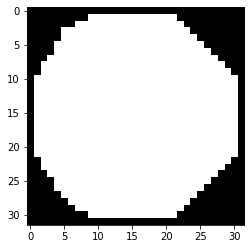

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(pic_34)

In [0]:
#model.py

import tensorflow as tf

def my_conv2d(inputs, filters, kernel_size, strides=(1, 1), padding='same', activation=None, name=None, reuse=None):
    return tf.layers.conv2d(inputs=inputs, filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation,
                kernel_initializer=tf.truncated_normal_initializer(stddev=0.1), bias_initializer=tf.constant_initializer(0.1), name=name, reuse=reuse)
                
def build_cnn(input_image=None, image_size=32, n_colors=3, activation_function=tf.nn.relu, reuse=None, name='VGG_NET_CNN'):
    # VGG_NET 32       # [samples, W, H, colors]
    with tf.variable_scope(name, reuse=reuse): 
        input_image = tf.reshape(input_image, shape=[-1, image_size, image_size, n_colors], name='Reshape_inputs')
        # layer_1   # 4个3*3*32
        
        h_conv1_1 = my_conv2d(input_image, filters=32, kernel_size=(3,3), activation=activation_function, name='conv1_1')
        h_conv1_2 = my_conv2d(h_conv1_1, filters=32, kernel_size=(3,3), activation=activation_function, name='conv1_2')
        h_conv1_3 = my_conv2d(h_conv1_2, filters=32, kernel_size=(3,3), activation=activation_function, name='conv1_3')
        h_conv1_4 = my_conv2d(h_conv1_3, filters=32, kernel_size=(3,3), activation=activation_function, name='conv1_4')
        h_pool1 = tf.layers.max_pooling2d(h_conv1_4, pool_size=(2,2), strides=(2,2), padding='same', name='max_pooling_1')    # shape is (None, 16, 16, 32)

        # layer_2
        h_conv2_1 = my_conv2d(h_pool1, filters=64, kernel_size=(3,3), activation=activation_function, name='conv2_1')
        h_conv2_2 = my_conv2d(h_conv2_1, filters=64, kernel_size=(3,3), activation=activation_function, name='conv2_2')
        h_pool2 = tf.layers.max_pooling2d(h_conv2_2, pool_size=(2,2), strides=(2,2), padding='same', name='max_pooling_2')    # shape is (None, 8, 8, 64)

        # layer_3
        h_conv3_1 = my_conv2d(h_pool2, filters=128, kernel_size=(3,3), activation=activation_function, name='conv3_1')
        h_pool3 = tf.layers.max_pooling2d(h_conv3_1, pool_size=(2,2), strides=(2,2), padding='same', name='max_pooling_3')    # shape is (None, 4, 4, 128)

    return h_pool3


def build_convpool_max(input_image, nb_classes, image_size=32, n_colors=3, 
        n_timewin=7, dropout_rate=0.5, name='CNN_Max', train=True, reuse=False):
    """
    Builds the complete network with maxpooling layer in time.
    :param input_image: list of EEG images (one image per time window)
    :param nb_classes: number of classes
    :param image_size: size of the input image (assumes a square input)
    :param n_colors: number of color channels in the image
    :param n_timewin: number of time windows in the snippet
    :return: a pointer to the output of last layer
    """
    with tf.name_scope(name):
        with tf.name_scope('Parallel_CNNs'):
            convnets = []
            # Build 7 parallel CNNs with shared weights
            for i in range(n_timewin):
                if i==0:
                    convnet = build_cnn(input_image[i],image_size=image_size,n_colors=n_colors, reuse=reuse)
                else:
                    convnet = build_cnn(input_image[i],image_size=image_size,n_colors=n_colors, reuse=True)
                convnets.append(convnet)    # list contains [None, 4, 4, 128]
            convnets = tf.stack(convnets)   # [n_timewin, nSamples, 4, 4, 128]
            convnets = tf.transpose(convnets, [1,0,2,3,4]) # [nSamples, n_timewin, 4, 4, 128]
        
        with tf.variable_scope('Max_pooling_over_flames'):
            # convpooling using Max pooling over frames
            convnets = tf.reshape(convnets, shape=[ -1, n_timewin, 4*4*128, 1])
            convpool = tf.nn.max_pool(convnets, # [nSamples, 1，4*4*128, 1]
                ksize=[1, n_timewin, 1, 1], strides=[1, 1, 1, 1], padding='VALID', name='convpool_max')
        

        convpool_flat = tf.reshape(convpool, [-1, 4*4*128])
        h_fc1_drop1 = tf.layers.dropout(convpool_flat, rate=dropout_rate, training=train, name='dropout_1')
        # input shape [batch, 4*4*128] output shape [batch, 512]
        h_fc1 = tf.layers.dense(h_fc1_drop1, 512, activation=tf.nn.relu, name='fc_relu_512')
        # dropout 
        h_fc1_drop2 = tf.layers.dropout(h_fc1, rate=dropout_rate, training=train, name='dropout_2')
        # inputshape [batch, 512] output shape [batch, nb_classes]    # the loss function contains the softmax activation
        prediction = tf.layers.dense(h_fc1_drop2, nb_classes, name='fc_softmax')
    
    return prediction

def build_convpool_conv1d(input_image, nb_classes, image_size=32, n_colors=3, 
        n_timewin=7, dropout_rate=0.5, name='CNN_Conv1d', train=True, reuse=False):
    """
    Builds the complete network with 1D-conv layer to integrate time from sequences of EEG images.
    :param input_image: list of EEG images (one image per time window)
    :param nb_classes: number of classes
    :param image_size: size of the input image (assumes a square input)S
    :param n_colors: number of color channels in the image
    :param n_timewin: number of time windows in the snippet
    :return: a pointer to the output of last layer
    """
    with tf.name_scope(name):
        with tf.name_scope('Parallel_CNNs'):
            convnets = []
            # Build 7 parallel CNNs with shared weights
            for i in range(n_timewin):
                if i==0:
                    convnet = build_cnn(input_image[i],image_size=image_size,n_colors=n_colors, reuse=reuse)
                else:
                    convnet = build_cnn(input_image[i],image_size=image_size,n_colors=n_colors, reuse=True)
                convnets.append(convnet)
            convnets = tf.stack(convnets)
            convnets = tf.transpose(convnets, [1,0,2,3,4])

        with tf.variable_scope('Conv1d_over_flames'):
            convnets = tf.reshape(convnets, shape=[ -1, n_timewin, 4*4*128, 1])
            convpool = my_conv2d(convnets, filters=64, kernel_size=(3, 4*4*128), strides=(1, 1), padding='valid', activation=tf.nn.relu, name='convpool_conv1d')


        with tf.variable_scope('Output_layers'):
            convpool_flat = tf.reshape(convpool, [-1, (n_timewin-2)*64])
            h_fc1_drop1 = tf.layers.dropout(convpool_flat, rate=dropout_rate, training=train, name='dropout_1')
            h_fc1 = tf.layers.dense(h_fc1_drop1, 256, activation=tf.nn.relu, name='fc_relu_256')
            h_fc1_drop2 = tf.layers.dropout(h_fc1, rate=dropout_rate, training=train, name='dropout_2')
            prediction = tf.layers.dense(h_fc1_drop2, nb_classes, name='fc_softmax')
    
    return prediction


def build_convpool_lstm(input_image, nb_classes, grad_clip=110, image_size=32, n_colors=3, 
        n_timewin=7, dropout_rate=0.5, num_units=128, batch_size=32, name='CNN_LSTM', train=True, reuse=False):
    """
    Builds the complete network with LSTM layer to integrate time from sequences of EEG images.
    :param input_image: list of EEG images (one image per time window)
    :param nb_classes: number of classes
    :param grad_clip:  the gradient messages are clipped to the given value during
                        the backward pass.
    :param image_size: size of the input image (assumes a square input)
    :param n_colors: number of color channels in the image
    :param n_timewin: number of time windows in the snippet
    :param num_units: number of units in the LSTMCell
    :return: a pointer to the output of last layer
    """
    with tf.name_scope(name):
        with tf.name_scope('Parallel_CNNs'):
            convnets = []
            # Build 7 parallel CNNs with shared weights
            for i in range(n_timewin):
                if i==0:
                    convnet = build_cnn(input_image[i],image_size=image_size,n_colors=n_colors, reuse=reuse)
                else:
                    convnet = build_cnn(input_image[i],image_size=image_size,n_colors=n_colors, reuse=True)
                convnets.append(convnet)
            convnets = tf.stack(convnets)
            convnets = tf.transpose(convnets, [1,0,2,3,4]) # 调换轴 shape: (nSamples, n_timewin, 4, 4, 128)

        with tf.variable_scope('LSTM_layer'):
            # (nSamples, n_timewin, 4, 4, 128) ==>  (nSamples, n_timewin, 4*4*128)
            convnets = tf.reshape(convnets, shape=[-1, n_timewin, 4*4*128], name='Reshape_for_lstm')
            #lstm cell inputs:[batchs, time_steps, 4*4*128]
            with tf.variable_scope('LSTM_Cell'):
                lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=num_units, forget_bias=1.0, state_is_tuple=True)
                outputs, final_state = tf.nn.dynamic_rnn(lstm_cell, convnets, dtype=tf.float32, time_major=False)
                # outputs.shape is (batch_size, time_steps, num_units)
                outputs = tf.transpose(outputs, [1,0,2])        # (time_steps, batch_size, num_units)
                outputs = outputs[-1]

        with tf.variable_scope('Output_layers'):
            h_fc1_drop1 = tf.layers.dropout(outputs, rate=dropout_rate, training=train, name='dropout_1')
            h_fc1 = tf.layers.dense(h_fc1_drop1, 256, activation=tf.nn.relu, name='fc_relu_256')
            h_fc1_drop2 = tf.layers.dropout(h_fc1, rate=dropout_rate, training=train, name='dropout_2')
            prediction = tf.layers.dense(h_fc1_drop2, nb_classes, name='fc_softmax')

    return prediction


def build_convpool_mix(input_image, nb_classes, grad_clip=110, image_size=32, n_colors=3, 
        n_timewin=7, dropout_rate=0.5, num_units=128, batch_size=32, name='CNN_Mix', train=True, reuse=False):
    """
    Builds the complete network with LSTM and 1D-conv layers combined
    :param input_image: list of EEG images (one image per time window)
    :param nb_classes: number of classes
    :param grad_clip:  the gradient messages are clipped to the given value during
                        the backward pass.
    :param imsize: size of the input image (assumes a square input)
    :param n_colors: number of color channels in the image
    :param n_timewin: number of time windows in the snippet
    :return: a pointer to the output of last layer
    """
    with tf.name_scope(name):
        with tf.name_scope('Parallel_CNNs'):
            convnets = []
            # Build 7 parallel CNNs with shared weights
            for i in range(n_timewin):
                if i==0:
                    convnet = build_cnn(input_image[i],image_size=image_size,n_colors=n_colors, reuse=reuse)
                else:
                    convnet = build_cnn(input_image[i],image_size=image_size,n_colors=n_colors, reuse=True)
                convnets.append(convnet)
            convnets = tf.stack(convnets)
            convnets = tf.transpose(convnets, [1,0,2,3,4])

        with tf.variable_scope('Conv1d_over_flames'):
            convpool = tf.reshape(convnets, shape=[ -1, n_timewin, 4*4*128, 1])
            convpool = my_conv2d(convpool, filters=64, kernel_size=(3, 4*4*128), strides=(1, 1), padding='valid', activation=tf.nn.relu, name='convpool_conv1d')
            conv1d_out = tf.reshape(convpool, [-1, (n_timewin-2)*64])

        with tf.variable_scope('LSTM_layer'):
            # (nSamples, n_timewin, 4, 4, 128) ==>  (nSamples, n_timewin, 4*4*128)
            convnets = tf.reshape(convnets, shape=[-1, n_timewin, 4*4*128], name='Reshape_for_lstm')
            #lstm cell inputs:[batchs, time_steps, 4*4*128]
            with tf.variable_scope('LSTM_Cell'):
                lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=num_units, forget_bias=1.0, state_is_tuple=True)
                outputs, final_state = tf.nn.dynamic_rnn(lstm_cell, convnets, dtype=tf.float32, time_major=False)
                # outputs.shape is (batch_size, time_steps, num_units)
                outputs = tf.transpose(outputs, [1,0,2])
                lstm_out = outputs[-1]

        with tf.variable_scope('Output_layers'):
            dense_in = tf.concat((conv1d_out, lstm_out), axis=1, name='concat_conv1d_lstm')    # shape [batch, (n_timewin-2)*64+num_units]
            h_fc1_drop1 = tf.layers.dropout(dense_in, rate=dropout_rate, training=train, name='dropout_1')
            h_fc1 = tf.layers.dense(h_fc1_drop1, 512, activation=tf.nn.relu, name='fc_relu_512')
            h_fc1_drop2 = tf.layers.dropout(h_fc1, rate=dropout_rate, training=train, name='dropout_2')
            prediction = tf.layers.dense(h_fc1_drop2, nb_classes, name='fc_softmax')

    return prediction

In [0]:
#train.py
import os
import tensorflow as tf
import numpy as np
import scipy.io
import time
import datetime

#from utils import reformatInput, load_or_generate_images, iterate_minibatches

#from model import build_cnn, build_convpool_conv1d, build_convpool_lstm, build_convpool_mix


timestamp = datetime.datetime.now().strftime('%Y-%m-%d.%H.%M')
log_path = os.path.join("runs", timestamp)


model_type = '1dconv'      # ['1dconv', 'maxpool', 'lstm', 'mix', 'cnn']
log_path = log_path + '_' + model_type

batch_size = 32
dropout_rate = 0.5

input_shape = [32, 32, 3]   # 1024
nb_class = 4
n_colors = 3

# whether to train cnn first, and load its weight for multi-frame model
reuse_cnn_flag = False

# learning_rate for different models
lrs = {
    'cnn': 1e-3,
    '1dconv': 1e-4,
    'lstm': 1e-4,
    'mix': 1e-4,
}

weight_decay = 1e-4
learning_rate = lrs[model_type] / 32 * batch_size
optimizer = tf.train.AdamOptimizer

num_epochs = 60

def train(images, labels, fold, model_type, batch_size, num_epochs, subj_id=0, reuse_cnn=False, 
    dropout_rate=dropout_rate ,learning_rate_default=1e-3, Optimizer=tf.train.AdamOptimizer, log_path=log_path):
    """
    A sample training function which loops over the training set and evaluates the network
    on the validation set after each epoch. Evaluates the network on the training set
    whenever the
    :param images: input images
    :param labels: target labels
    :param fold: tuple of (train, test) index numbers
    :param model_type: model type ('cnn', '1dconv', 'lstm', 'mix')
    :param batch_size: batch size for training
    :param num_epochs: number of epochs of dataset to go over for training
    :param subj_id: the id of fold for storing log and the best model
    :param reuse_cnn: whether to train cnn first, and load its weight for multi-frame model
    :return: none
    """

    with tf.name_scope('Inputs'):
        input_var = tf.placeholder(tf.float32, [None, None, 32, 32, n_colors], name='X_inputs')
        target_var = tf.placeholder(tf.int64, [None], name='y_inputs')
        tf_is_training = tf.placeholder(tf.bool, None, name='is_training')

    num_classes = len(np.unique(labels))
    (X_train, y_train), (X_val, y_val), (X_test, y_test) = reformatInput(images, labels, fold)


    print('Train set label and proportion:\t', np.unique(y_train, return_counts=True))
    print('Val   set label and proportion:\t', np.unique(y_val, return_counts=True))
    print('Test  set label and proportion:\t', np.unique(y_test, return_counts=True))

    print('The shape of X_trian:\t', X_train.shape)
    print('The shape of X_val:\t', X_val.shape)
    print('The shape of X_test:\t', X_test.shape)
    

    print("Building model and compiling functions...")
    if model_type == '1dconv':
        network = build_convpool_conv1d(input_var, num_classes, train=tf_is_training, 
                            dropout_rate=dropout_rate, name='CNN_Conv1d'+'_sbj'+str(subj_id))
    elif model_type == 'lstm':
        network = build_convpool_lstm(input_var, num_classes, 100, train=tf_is_training, 
                            dropout_rate=dropout_rate, name='CNN_LSTM'+'_sbj'+str(subj_id))
    elif model_type == 'mix':
        network = build_convpool_mix(input_var, num_classes, 100, train=tf_is_training, 
                            dropout_rate=dropout_rate, name='CNN_Mix'+'_sbj'+str(subj_id))
    elif model_type == 'cnn':
        with tf.name_scope(name='CNN_layer'+'_fold'+str(subj_id)):
            network = build_cnn(input_var)  # output shape [None, 4, 4, 128]
            convpool_flat = tf.reshape(network, [-1, 4*4*128])
            h_fc1_drop1 = tf.layers.dropout(convpool_flat, rate=dropout_rate, training=tf_is_training, name='dropout_1')
            h_fc1 = tf.layers.dense(h_fc1_drop1, 256, activation=tf.nn.relu, name='fc_relu_256')
            h_fc1_drop2 = tf.layers.dropout(h_fc1, rate=dropout_rate, training=tf_is_training, name='dropout_2')
            network = tf.layers.dense(h_fc1_drop2, num_classes, name='fc_softmax')
            # the loss function contains the softmax activation
    else:
        raise ValueError("Model not supported ['1dconv', 'maxpool', 'lstm', 'mix', 'cnn']")

    Train_vars = tf.trainable_variables()

    prediction = network

    with tf.name_scope('Loss'):
        l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in Train_vars if 'kernel' in v.name])
        ce_loss = tf.losses.sparse_softmax_cross_entropy(labels=target_var, logits=prediction)
        _loss = ce_loss + weight_decay*l2_loss

    # decay_steps learning rate decay
    decay_steps = 3*(len(y_train)//batch_size)   # len(X_train)//batch_size  the training steps for an epcoh
    with tf.name_scope('Optimizer'):
        # learning_rate = learning_rate_default * Decay_rate^(global_steps/decay_steps)
        global_steps = tf.Variable(0, name="global_step", trainable=False)
        learning_rate = tf.train.exponential_decay(     # learning rate decay
            learning_rate_default,  # Base learning rate.
            global_steps,
            decay_steps,
            0.95,  # Decay rate.
            staircase=True)
        optimizer = Optimizer(learning_rate)    # GradientDescentOptimizer  AdamOptimizer
        train_op = optimizer.minimize(_loss, global_step=global_steps, var_list=Train_vars)

    with tf.name_scope('Accuracy'):
        prediction = tf.argmax(prediction, axis=1)
        correct_prediction = tf.equal(prediction, target_var)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

    # Output directory for models and summaries
    # choose different path for different model and subject
    out_dir = os.path.abspath(os.path.join(os.path.curdir, log_path, (model_type+'_'+str(subj_id)) ))
    print("Writing to {}\n".format(out_dir))

    # Summaries for loss, accuracy and learning_rate
    loss_summary = tf.summary.scalar('loss', _loss)
    acc_summary = tf.summary.scalar('train_acc', accuracy)
    lr_summary = tf.summary.scalar('learning_rate', learning_rate)

    # Train Summaries
    train_summary_op = tf.summary.merge([loss_summary, acc_summary, lr_summary])
    train_summary_dir = os.path.join(out_dir, "summaries", "train")
    train_summary_writer = tf.summary.FileWriter(train_summary_dir, tf.get_default_graph())

    # Dev summaries
    dev_summary_op = tf.summary.merge([loss_summary, acc_summary])
    dev_summary_dir = os.path.join(out_dir, "summaries", "dev")
    dev_summary_writer = tf.summary.FileWriter(dev_summary_dir, tf.get_default_graph())

    # Test summaries
    test_summary_op = tf.summary.merge([loss_summary, acc_summary])
    test_summary_dir = os.path.join(out_dir, "summaries", "test")
    test_summary_writer = tf.summary.FileWriter(test_summary_dir, tf.get_default_graph())


    # Checkpoint directory. Tensorflow assumes this directory already exists so we need to create it
    checkpoint_dir = os.path.abspath(os.path.join(out_dir, "checkpoints"))
    checkpoint_prefix = os.path.join(checkpoint_dir, model_type)
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)


    if model_type != 'cnn' and reuse_cnn:
        # saver for reuse the CNN weight
        reuse_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='VGG_NET_CNN')
        original_saver = tf.train.Saver(reuse_vars)         # Pass the variables as a list

    saver = tf.train.Saver(tf.global_variables(), max_to_keep=1)

    print("Starting training...")
    total_start_time = time.time()
    best_validation_accu = 0

    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    with tf.Session() as sess:
        sess.run(init_op)
        if model_type != 'cnn' and reuse_cnn:
            cnn_model_path = os.path.abspath(
                                os.path.join(
                                    os.path.curdir, log_path, ('cnn_'+str(subj_id)), 'checkpoints' ))
            cnn_model_path = tf.train.latest_checkpoint(cnn_model_path)
            print('-'*20)
            print('Load cnn model weight for multi-frame model from {}'.format(cnn_model_path))
            original_saver.restore(sess, cnn_model_path)

        stop_count = 0  # count for earlystopping
        for epoch in range(num_epochs):
            print('-'*50)
            # Train set
            train_err = train_acc = train_batches = 0
            start_time = time.time()
            for batch in iterate_minibatches(X_train, y_train, batch_size, shuffle=False):
                inputs, targets = batch
                summary, _, pred, loss, acc = sess.run([train_summary_op, train_op, prediction, _loss, accuracy], 
                    {input_var: inputs, target_var: targets, tf_is_training: True})
                train_acc += acc
                train_err += loss
                train_batches += 1
                train_summary_writer.add_summary(summary, sess.run(global_steps))

            av_train_err = train_err / train_batches
            av_train_acc = train_acc / train_batches

            # Val set
            summary, pred, av_val_err, av_val_acc = sess.run([dev_summary_op, prediction, _loss, accuracy],
                    {input_var: X_val, target_var: y_val, tf_is_training: False})
            dev_summary_writer.add_summary(summary, sess.run(global_steps))

            
            print("Epoch {} of {} took {:.3f}s".format(
                epoch + 1, num_epochs, time.time() - start_time))
            
            fmt_str = "Train \tEpoch [{:d}/{:d}]  train_Loss: {:.4f}\ttrain_Acc: {:.2f}"
            print_str = fmt_str.format(epoch + 1, num_epochs, av_train_err, av_train_acc*100)
            print(print_str)

            fmt_str = "Val \tEpoch [{:d}/{:d}]  val_Loss: {:.4f}\tval_Acc: {:.2f}"
            print_str = fmt_str.format(epoch + 1, num_epochs, av_val_err, av_val_acc*100)
            print(print_str)
            
            # Test set
            summary, pred, av_test_err, av_test_acc = sess.run([test_summary_op, prediction, _loss, accuracy],
                {input_var: X_test, target_var: y_test, tf_is_training: False})
            test_summary_writer.add_summary(summary, sess.run(global_steps))
            
            fmt_str = "Test \tEpoch [{:d}/{:d}]  test_Loss: {:.4f}\ttest_Acc: {:.2f}"
            print_str = fmt_str.format(epoch + 1, num_epochs, av_test_err, av_test_acc*100)
            print(print_str)

            if av_val_acc > best_validation_accu:   # early_stoping
                stop_count = 0
                eraly_stoping_epoch = epoch
                best_validation_accu = av_val_acc
                test_acc_val = av_test_acc
                saver.save(sess, checkpoint_prefix, global_step=sess.run(global_steps))
            else:
                stop_count += 1
                if stop_count >= 10: # stop training if val_acc dose not imporve for over 10 epochs
                    break

        train_batches = train_acc = 0
        for batch in iterate_minibatches(X_train, y_train, batch_size, shuffle=False):
            inputs, targets = batch
            acc = sess.run(accuracy, {input_var: X_train, target_var: y_train, tf_is_training: False})
            train_acc += acc
            train_batches += 1

        last_train_acc = train_acc / train_batches
        
        
        last_val_acc = av_val_acc
        last_test_acc = av_test_acc
        print('-'*50)
        print('Time in total:', time.time()-total_start_time)
        print("Best validation accuracy:\t\t{:.2f} %".format(best_validation_accu * 100))
        print("Test accuracy when got the best validation accuracy:\t\t{:.2f} %".format(test_acc_val * 100))
        print('-'*50)
        print("Last train accuracy:\t\t{:.2f} %".format(last_train_acc * 100))
        print("Last validation accuracy:\t\t{:.2f} %".format(last_val_acc * 100))
        print("Last test accuracy:\t\t\t\t{:.2f} %".format(last_test_acc * 100))
        print('Early Stopping at epoch: {}'.format(eraly_stoping_epoch+1))

    train_summary_writer.close()
    dev_summary_writer.close()
    test_summary_writer.close()
    return [last_train_acc, best_validation_accu, test_acc_val, last_val_acc, last_test_acc]



def train_all_model(num_epochs=3000):
    nums_subject = 13
    # Leave-Subject-Out cross validation
    subj_nums = np.squeeze(scipy.io.loadmat('./SampleData/trials_subNums.mat')['subjectNum'])
    fold_pairs = []
    for i in np.unique(subj_nums):
        ts = subj_nums == i
        tr = np.squeeze(np.nonzero(np.bitwise_not(ts)))
        ts = np.squeeze(np.nonzero(ts))
        np.random.shuffle(tr)
        np.random.shuffle(ts)
        fold_pairs.append((tr, ts))


    images_average, images_timewin, labels = load_or_generate_images(
                                                file_path='./SampleData/', average_image=3)


    print('*'*200)
    acc_buf = []
    for subj_id in range(nums_subject):
        print('-'*100)
        
        if model_type == 'cnn':
            print('The subjects', subj_id, '\t\t Training the ' + 'cnn' + ' Model...')
            acc_temp = train(images_average, labels, fold_pairs[subj_id], 'cnn', 
                                batch_size=batch_size, num_epochs=num_epochs, subj_id=subj_id,
                                learning_rate_default=lrs['cnn'], Optimizer=optimizer, log_path=log_path)
            acc_buf.append(acc_temp)
            tf.reset_default_graph()
            print('Done!')

        else:
            # whether to train cnn first, and load its weight for multi-frame model
            if reuse_cnn_flag is True:
                print('The subjects', subj_id, '\t\t Training the ' + 'cnn' + ' Model...')
                acc_temp = train(images_average, labels, fold_pairs[subj_id], 'cnn', 
                                    batch_size=batch_size, num_epochs=num_epochs, subj_id=subj_id,
                                    learning_rate_default=lrs['cnn'], Optimizer=optimizer, log_path=log_path)
                # acc_buf.append(acc_temp)
                tf.reset_default_graph()
                print('Done!')
        
            print('The subjects', subj_id, '\t\t Training the ' + model_type + ' Model...')
            print('Load the CNN model weight for backbone...')
            acc_temp = train(images_timewin, labels, fold_pairs[subj_id], model_type, 
                            batch_size=batch_size, num_epochs=num_epochs, subj_id=subj_id, reuse_cnn=reuse_cnn_flag, 
                            learning_rate_default=learning_rate, Optimizer=optimizer, log_path=log_path)
                                
            acc_buf.append(acc_temp)
            tf.reset_default_graph()
            print('Done!')
        
        # return

    print('All folds for {} are done!'.format(model_type))
    acc_buf = (np.array(acc_buf)).T
    acc_mean = np.mean(acc_buf, axis=1).reshape(-1, 1)
    acc_buf = np.concatenate([acc_buf, acc_mean], axis=1)
    # the last column is the mean of current row
    print('Last_train_acc:\t', acc_buf[0], '\tmean :', np.mean(acc_buf[0][-1]))
    print('Best_val_acc:\t', acc_buf[1], '\tmean :', np.mean(acc_buf[1][-1]))
    print('Earlystopping_test_acc:\t', acc_buf[2], '\tmean :', np.mean(acc_buf[2][-1]))
    print('Last_val_acc:\t', acc_buf[3], '\tmean :', np.mean(acc_buf[3][-1]))
    print('Last_test_acc:\t', acc_buf[4], '\tmean :', np.mean(acc_buf[4][-1]))
    np.savetxt('./Accuracy_{}.csv'.format(model_type), acc_buf, fmt='%.4f', delimiter=',')


if __name__ == '__main__':
    os.environ["CUDA_VISIBLE_DEVICES"] = "0"
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    np.random.seed(2018)
    tf.set_random_seed(2018)

    train_all_model(num_epochs=num_epochs)


----------------------------------------------------------------------------------------------------
Loading original data...
Loading data from ./SampleData/FeatureMat_timeWin.mat
Data loading complete. Shape is (2670, 1345)


Generating average images over time windows...
Saving images_average done!


Generating images for all time windows...
Saving images for all time windows done!
The shape of labels.shape (2670,)
The shape of images_average.shape (1, 2670, 32, 32, 3)
The shape of images_timewin is (7, 2670, 32, 32, 3)
********************************************************************************************************************************************************************************************************
----------------------------------------------------------------------------------------------------
The subjects 0 		 Training the 1dconv Model...
Load the CNN model weight for backbone...
Train set label and proportion:	 (array([0, 1, 2, 3], dtype=int32), array([643, 6

**Con el IV-2a dataset**

In [0]:
df_ft = pd.read_pickle('/content/drive/My Drive/tf_EEGLearn/SampleData_original/df_ft.pkl')
df_ft.shape

(273, 88)

In [0]:
class_df = pd.read_pickle('/content/drive/My Drive/tf_EEGLearn/SampleData_original/class_df.pkl')
class_df.shape

(273, 1)

In [0]:
# Ajustamos las clases entre 0 y 3
def minus_one(value):
  value = (value-1)
  return value

class_df[0] = class_df[0].apply(lambda x: minus_one(x))
class_df.head()

,0
0,3.0
1,2.0
2,1.0
3,0.0
4,0.0


1. Quitamos la banda Alfa.    
2. Pasamos las 3 bandas/cana y los 22 canales -> 3 bandas y 64 canales
3. Multiplicamos por 7 timewindows

In [0]:
df_ft = df_ft.iloc[0:,22:]

In [0]:
df_ft.shape

(273, 66)

In [0]:
for i in range(22,44):
  df_ft = df_ft.rename(columns={str(i):str(i+23)})


In [0]:
df_ft = pd.read_pickle('/content/drive/My Drive/tf_EEGLearn/SampleData/df_ft_temp.pkl')
df_ft.shape

(273, 66)

In [0]:
df_ft.head()

,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,-0.721696,-0.752106,-0.690890,-0.777516,-0.754970,-0.826731,-0.845798,-0.793855,-0.714652,-0.728103,-0.697248,-0.740277,-0.730030,-0.796146,-0.706954,-0.804676,-0.815711,-0.793903,-0.771252,-0.808939,-0.693613,-0.733906,-0.731509,-0.645648,-0.685126,-0.731975,-0.701287,-0.685877,-0.693477,-0.735677,-0.738668,-0.744498,-0.711855,-0.668469,-0.704010,-0.736837,-0.776658,-0.710078,-0.772473,-0.697936,-0.753219,-0.725261,-0.759394,-0.711120,-0.504037,-0.528600,-0.521379,-0.534726,-0.532189,-0.536626,-0.533052,-0.537865,-0.531633,-0.530215,-0.527548,-0.535719,-0.510585,-0.532090,-0.515630,-0.525017,-0.523704,-0.536316,-0.538903,-0.528738,-0.524347,-0.521290
1,-0.654029,-0.624252,-0.687162,-0.601456,-0.638804,-0.598986,-0.653844,-0.650862,-0.673932,-0.687223,-0.647470,-0.619691,-0.627284,-0.571826,-0.570483,-0.578843,-0.587101,-0.584718,-0.664318,-0.662999,-0.674257,-0.617321,-0.568414,-0.579385,-0.639309,-0.602290,-0.549320,-0.544051,-0.495825,-0.503406,-0.537672,-0.556277,-0.559990,-0.585951,-0.646330,-0.670151,-0.626008,-0.609910,-0.555265,-0.542015,-0.556100,-0.545538,-0.556669,-0.539328,-0.550045,-0.562285,-0.557049,-0.581345,-0.583099,-0.592830,-0.572451,-0.574189,-0.593380,-0.570953,-0.588463,-0.560649,-0.560341,-0.565574,-0.560697,-0.578635,-0.568993,-0.577796,-0.566228,-0.555176,-0.562587,-0.547323
2,-0.804041,-0.933742,-0.869275,-0.811227,-0.804144,-0.795203,-0.821829,-0.796433,-0.742585,-0.762947,-0.748594,-0.783877,-0.774697,-0.757631,-0.731596,-0.771752,-0.771446,-0.756198,-0.804112,-0.764991,-0.756188,-0.762770,-0.536106,-0.508121,-0.556145,-0.530218,-0.574246,-0.532636,-0.548821,-0.538139,-0.553182,-0.516187,-0.545071,-0.545567,-0.569471,-0.561158,-0.586124,-0.549705,-0.527076,-0.493925,-0.529127,-0.503369,-0.529545,-0.503705,-0.652288,-0.666196,-0.661818,-0.665908,-0.663741,-0.653348,-0.647461,-0.653135,-0.646308,-0.640821,-0.625471,-0.669046,-0.673073,-0.652404,-0.634918,-0.643893,-0.633583,-0.664012,-0.645560,-0.643764,-0.638451,-0.647914
3,-0.545851,-0.565296,-0.591280,-0.608661,-0.581014,-0.609476,-0.593906,-0.585942,-0.567717,-0.551991,-0.506550,-0.549321,-0.575795,-0.574125,-0.526543,-0.564181,-0.545433,-0.579153,-0.578761,-0.557845,-0.541173,-0.571798,-0.476723,-0.509422,-0.497068,-0.575684,-0.528181,-0.553610,-0.518636,-0.545647,-0.529410,-0.563381,-0.492491,-0.484939,-0.446005,-0.522725,-0.535244,-0.540828,-0.563194,-0.593129,-0.538480,-0.600119,-0.589581,-0.553609,-0.558326,-0.549260,-0.557584,-0.543297,-0.556154,-0.560584,-0.571474,-0.563720,-0.565517,-0.566850,-0.554338,-0.562687,-0.555326,-0.564270,-0.572139,-0.563143,-0.558087,-0.582718,-0.572605,-0.578391,-0.568415,-0.576559
4,-0.598039,-0.663778,-0.643474,-0.651273,-0.616346,-0.670196,-0.671527,-0.632857,-0.624373,-0.637411,-0.626019,-0.649927,-0.634956,-0.683834,-0.653385,-0.654430,-0.632882,-0.653204,-0.614375,-0.607657,-0.607574,-0.631195,-0.621040,-0.654177,-0.605923,-0.646082,-0.667108,-0.677451,-0.651248,-0.693637,-0.700750,-0.647239,-0.619592,-0.621243,-0.603457,-0.698178,-0.657773,-0.641300,-0.641880,-0.640196,-0.674966,-0.671401,-0.700366,-0.638537,-0.616349,-0.635906,-0.619504,-0.634956,-0.619744,-0.620401,-0.632464,-0.657514,-0.656529,-0.663677,-0.634894,-0.644252,-0.635623,-0.624669,-0.619617,-0.623751,-0.632371,-0.638212,-0.647378,-0.646726,-0.653975,-0.652783


In [0]:
'''
for i in range(45,67):
  df_ft[str(i-44)] = df_ft[str(i)]


In [0]:
df = np.array(df_ft)
df.shape

(273, 66)

In [0]:
df_fill = np.zeros((273,198))

In [0]:
# 
df_fill[:,0:22] = df[:,0:22]
df_fill[:,22:44] = df[:,0:22]
df_fill[:,44:66] = df[:,0:22]

df_fill[:,66:88] = df[:,22:44]
df_fill[:,88:110] = df[:,22:44]
df_fill[:,110:132] = df[:,22:44]

df_fill[:,132:154] = df[:,44:66]
df_fill[:,154:176] = df[:,44:66]
df_fill[:,176:198] = df[:,44:66]

df_fill.shape

(273, 198)

In [0]:
# Borramos dos columnas de cada banda para quedarnos con 64x3
df_fill = np.delete(df_fill, [65,66,67,68], axis = 1)
df_fill = np.delete(df_fill, [192,193], axis = 1)
df_fill.shape

(273, 192)

In [0]:
df_full = np.repeat(df_fill, 7, axis = 1 )
df_full.shape

(273, 1344)

In [0]:
labels_df = np.array(class_df)
labels_df = labels_df.reshape(1,273)
labels_df

array([[3., 2., 1., 0., 0., 1., 2., 3., 1., 2., 0., 0., 0., 3., 1., 1.,
        0., 0., 2., 0., 1., 3., 2., 0., 3., 3., 1., 3., 3., 1., 0., 1.,
        2., 2., 2., 3., 2., 0., 3., 1., 2., 1., 2., 3., 2., 0., 0., 0.,
        3., 1., 2., 0., 2., 3., 0., 2., 2., 0., 2., 1., 3., 3., 3., 0.,
        3., 1., 3., 1., 0., 2., 1., 0., 2., 2., 0., 2., 3., 3., 1., 0.,
        1., 3., 1., 3., 2., 1., 1., 1., 2., 0., 1., 2., 2., 3., 0., 0.,
        1., 3., 3., 3., 1., 0., 2., 1., 3., 0., 3., 2., 1., 3., 3., 0.,
        1., 1., 2., 3., 1., 0., 0., 3., 1., 0., 2., 1., 1., 2., 0., 3.,
        2., 2., 2., 2., 0., 1., 0., 1., 0., 0., 2., 2., 1., 2., 3., 0.,
        3., 0., 0., 1., 3., 2., 1., 3., 2., 3., 2., 3., 1., 1., 3., 0.,
        1., 1., 1., 2., 3., 0., 3., 0., 2., 0., 3., 0., 2., 0., 1., 2.,
        2., 3., 0., 1., 3., 1., 2., 0., 3., 1., 3., 0., 0., 2., 2., 1.,
        3., 1., 1., 0., 1., 3., 3., 1., 1., 1., 1., 3., 2., 3., 0., 1.,
        2., 1., 0., 3., 0., 3., 0., 0., 0., 0., 2., 3., 1., 2., 

In [0]:
features.shape

(2670, 1344)

In [0]:
labels.shape

(2670,)

In [0]:
labels

array([0., 0., 0., ..., 3., 3., 3.])